In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 
from pathlib import Path
import re
import pandas as pd
from TS_aux import load_file
from TS_aux import shot_data


baseDir = Path().resolve().parent
folder_path = baseDir/"Kinshock"/"Kinshock-19A"/"csv"
ls = [f for f in os.listdir(folder_path) if os.path.isdir(Path(folder_path)/f)]
data = {}

print("Stuff in folder :\n")
for i in range(len(ls)):
    print(f"[{i:g}] {ls[i]}\n")
    
while True:
    n = int(input("Which shot would you like to see fits for?\n"))
    fp2 = os.listdir(Path(folder_path)/ls[n])
    if str(ls[n]) not in data:
        data[str(ls[n])] = {}
    lscsv = [f for f in fp2]
    print(f"Files for shot {ls[n]} :\n")
    for i in range(len(lscsv)):
        print(f"[{i}] {lscsv[i]}")
    
    fn = input("Which files do you want to import?\n")
    files  = re.split(r"[ ,]+", fn)
    files = [int(x) for x in files]
    for i in files:
        fp = Path(folder_path)/ls[n]/lscsv[i]
        if fp.is_dir():
            files2 = os.listdir(fp)
            for f in files2:
                load_file(data,ls[n],f,Path(fp)/f)
        else:
            load_file(data,ls[n],lscsv[i],fp)
            
    flag = input("Load more shots?\n")
    if flag in ("n","no","nah","","nope"):
        break



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Stuff in folder :

[0] 92522

[1] 92524

[2] 92525

[3] 92527

[4] 92528

[5] 92530

[6] 92531

[7] 92532

[8] 92533

[9] 92534

[10] 92535

[11] 92536

[12] 92537

[13] 92538

Files for shot 92534 :

[0] 92534-4
[1] 92534_0to400.csv
[2] 92534_almostfull.csv
[3] 92534_middle.csv
<xarray.Dataset> Size: 467kB
Dimensions:        (Radius (\mum): 28, Wavelength: 1024)
Coordinates:
  * Wavelength     (Wavelength) float64 8kB 385.1 385.3 385.6 ... 662.0 662.2
  * Radius (\mum)  (Radius (\mum)) float64 224B -749.0 -697.7 ... 548.9 600.2
Data variables:
    fit            (Radius (\mum), Wavelength) float64 229kB ...
    data           (Radius (\mum), Wavelength) float64 229kB ...
Loaded 92534_4_nersc.csv
Loaded losses_92534_4_nersc.csv


In [ ]:
#### PLOT LINEOUTS AND FITS ####
bin_file = data[ls[n]]['singleVa_ion_fit_and_data.nc']
bin_file2 = data[ls[n]]['multiVa_ion_fit_and_data.nc']
#e_file = data[ls[n]]['92536_13_ele_fit_and_data.nc']
#e_file2 = data[ls[n]]['92536_15_ele_fit_and_data.nc']
img = bin_file["data"].values
fit = bin_file["fit"].values
#e_img = e_file["data"].values
#e_fit = e_file["data"].values

img2 = bin_file2["data"].values
fit2 = bin_file2["fit"].values
#e2_img = e_file2["data"].values
#e2_fit = e_file2["data"].values


r = bin_file["Radius (\mum)"].values
l = bin_file["Wavelength"].values

r2 = bin_file2["Radius (\mum)"].values
l2 = bin_file2["Wavelength"].values

x = int(input("Which radius do you want to plot lineout for?\n"))
idx = (np.abs(r-x)).argmin()
idx2 = (np.abs(r2+x)).argmin()
fig, ax = plt.subplots(figsize=(10,5))
# ax.plot(l2,img2[idx2,:],lw = 2,color='orange',label=f'data({int(r[idx])})')
# ax.plot(l,fit[idx,:],lw = 2,color='orangered',linestyle='--', label=f'2 species fit({int(r[idx])})')
# ax.plot(l2,fit2[idx2,:],lw=2,color='mediumblue',linestyle='--', label=f'3 species fit({int(r2[idx2])})')

# For the TS img plot
ax.plot(l2,img2[idx2,:],lw = 2,color='orange',label=f' Thomson Data')
ax.plot(l,fit[idx,:],lw = 2,color='red',linestyle='--', label=f'Single Flow Velocity fit')
ax.plot(l2,fit2[idx2,:],lw=2,color='blue',linestyle='--', label=f'Multi-Flow Velocity fit')

# ax.plot(l,fit[idx+1,:],color='blue',linestyle='--', label=f'fit({r[idx+1]})')
# ax.plot(l,fit[idx-1,:],color='green',linestyle='--', label=f'fit({r[idx-1]})')
ax.set_xlabel(r"$\lambda (nm)$")
ax.set_ylabel(r"$Amplitude (a.u.)$")
ax.set_xlim([523.5, 528])
#ax.set_ylim([3.55, 4.75])

# plt.rcParams.update({
#    'font.family': 'serif',
#    'font.serif': ['Times New Roman'],
#     'font.size': 10,
#     'axes.labelsize': 11,
#     'axes.titlesize': 11,
#     'xtick.labelsize': 9,
#     'ytick.labelsize': 9,
#     'legend.fontsize': 9,
#  })

ax.tick_params(direction='in', length=3.5, width=0.8, colors='black')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.legend()

In [ ]:
### PLOT LEARNED PARAMETERS ###
lp = data[str(ls[n])]['92525_12_nersc.csv']
r = shot_data.loc[92525,"pointing"] - lp["Radius (\\mum)"]/10**3
bv = (r*10**2)/shot_data.loc[92525,"timing"]
## Ti, Va, fract plot for all 3 species 
plt.rcParams.update({
#    "font.family": "serif",             # pick font family
#    "font.serif": ["Arial"],  # pick specific font
    "font.size": 17,                     # set size
    "axes.labelsize": 17,    # font size for axis labels
    "axes.titlesize": 17     # font size for titles
    
})

fig1, ax1  = plt.subplots(3,1,figsize=(10,20))

ax1[0].plot(r, lp["fract_ion-2"],color='orangered',linewidth=2, linestyle='-', label='Hot H')
ax1[0].plot(r, lp["fract_ion-1"],color='mediumblue',linewidth=2, linestyle='-', label='Cold H')
ax1[0].plot(r, lp["fract_ion-3"],color='MediumSeaGreen',linewidth=2, linestyle='-', label='N')
ax1[0].set_title('Fractions')
ax1[0].set_xlabel(r"$x (mm)$")
ax1[0].set_ylabel(r"$Fraction$")
ax1[0].legend()

ax1[1].plot(r, lp["Ti_ion-2"],color='orangered',linewidth=2,linestyle='-')
ax1[1].plot(r, lp["Ti_ion-1"],color='mediumblue',linewidth=2,linestyle='-')
ax1[1].plot(r, lp["Ti_ion-3"],color='MediumSeaGreen',linewidth=2,linestyle='-')
ax1[1].set_title('Temperatures')
ax1[1].set_xlabel(r"$x (mm)$")
ax1[1].set_ylabel(r"$T_{i} (keV)$")

ax1[2].plot(r, lp["Va_ion-2"],color='orangered',linewidth=2,linestyle='-')
ax1[2].plot(r, lp["Va_ion-1"],color='mediumblue',linewidth=2,linestyle='-')
ax1[2].plot(r, lp["Va_ion-3"],color='MediumSeaGreen',linewidth=2,linestyle='-')
ax1[2].plot(r, bv,color='k',linewidth=2,linestyle='--')
ax1[2].set_title('Velocities')
ax1[2].set_xlabel(r"$x (mm)$")
ax1[2].set_ylabel(r"$Va_{i} (10^{6} cm/s)$")


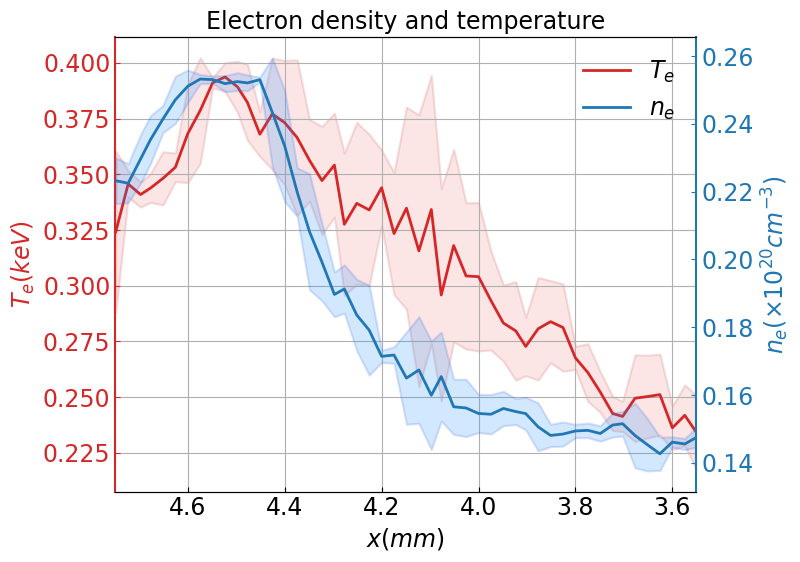

In [37]:
### PLOT 92537 ELECTRONS ###
from plot_92537_EPW import plot_92537_EPW
plot_92537_EPW(data)

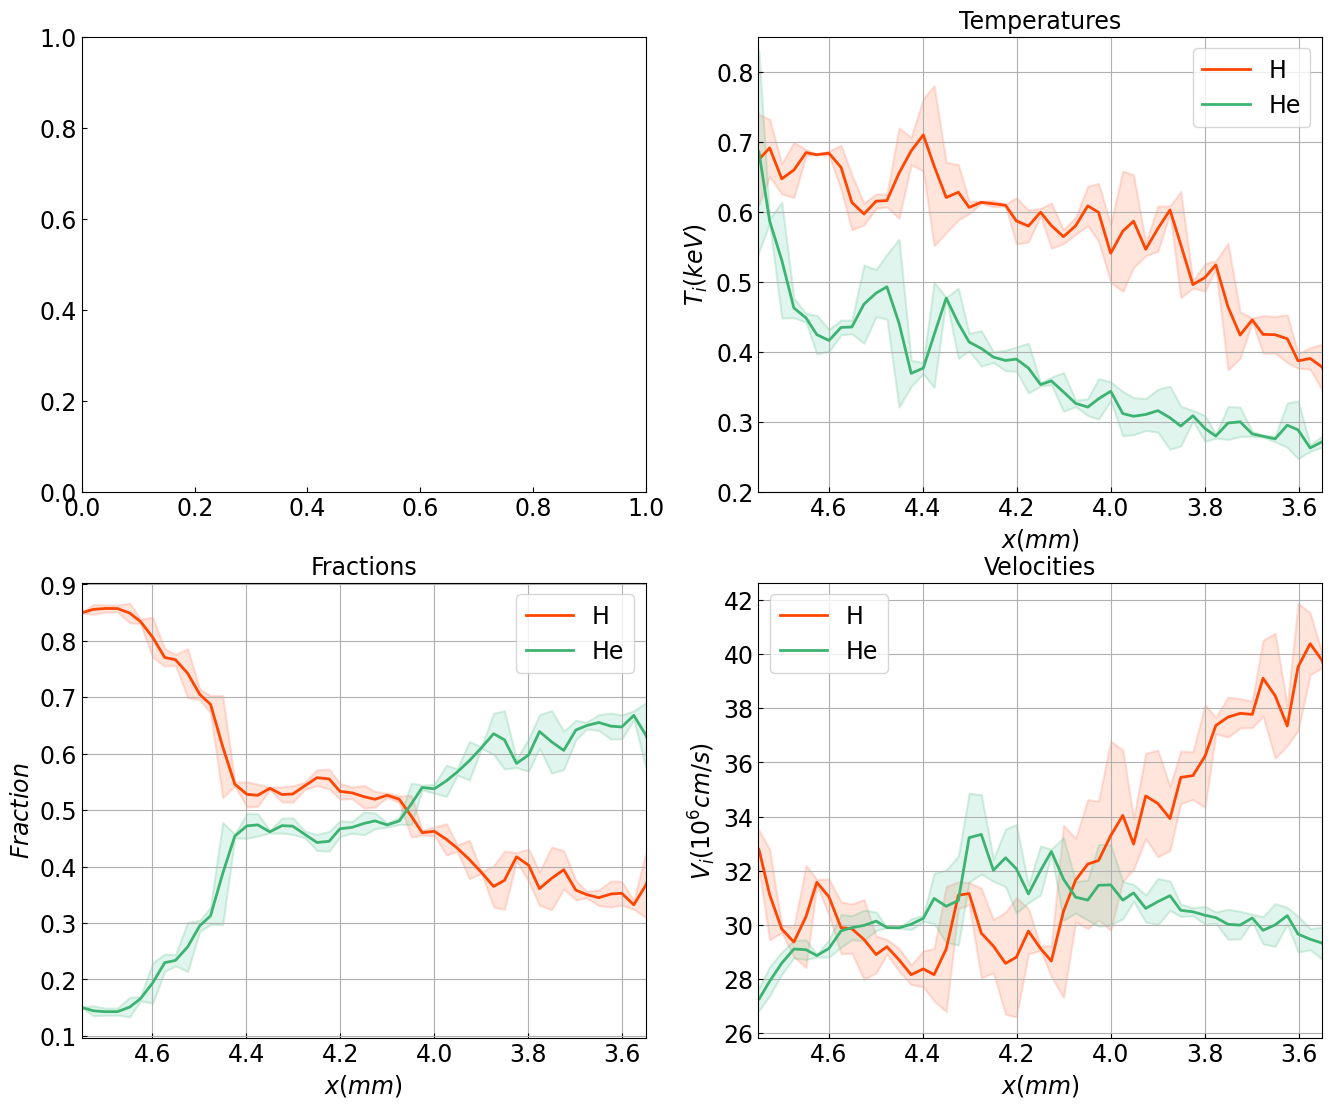

In [29]:
### PLOT 92537 IAW ###
from plot_92537 import plot_92537
plot_92537(data)

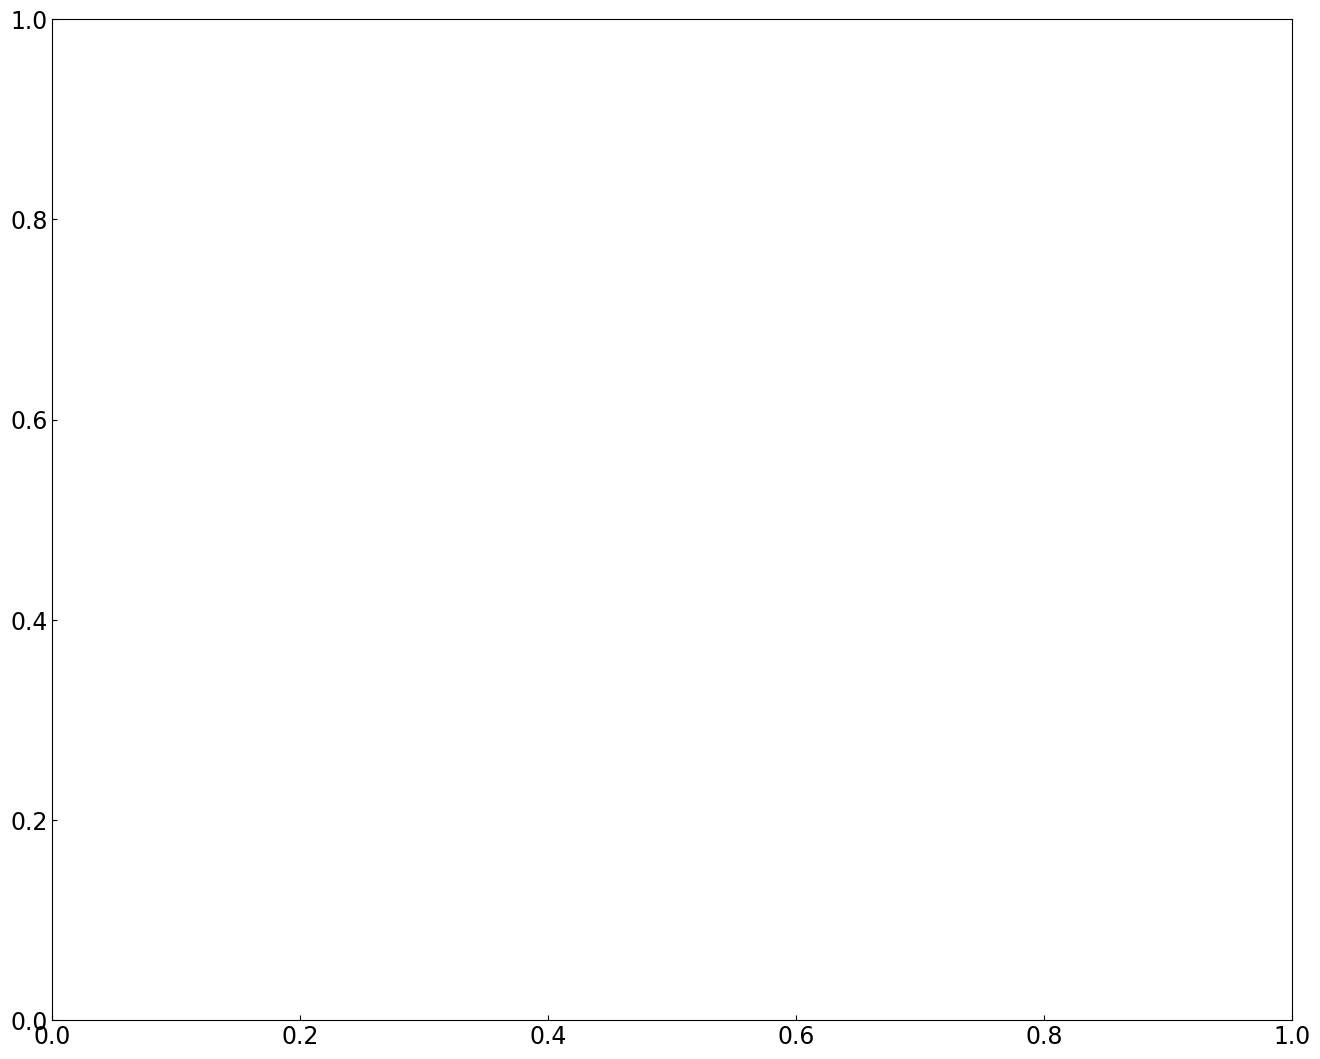

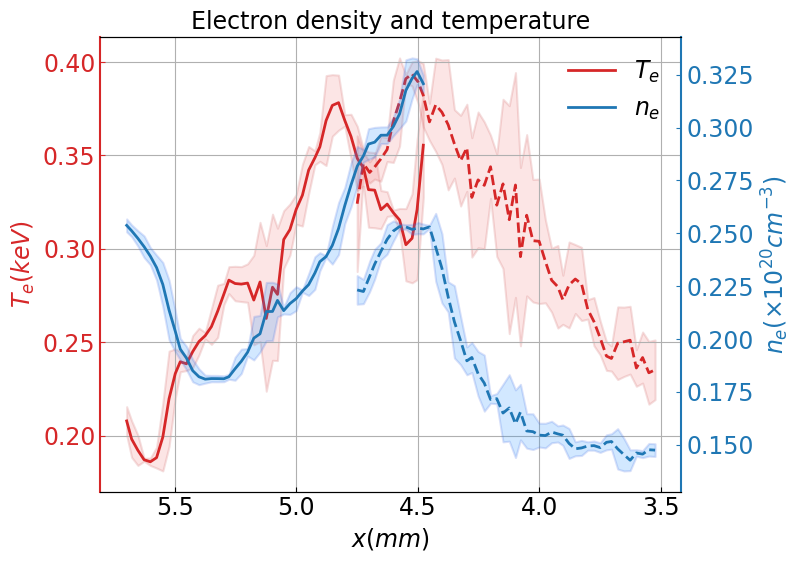

In [3]:
### PLOT 92535-36-37 ELECTRONS ###
from plot_stitch_35_36_37_EPW import plot_stitch_35_36_37_EPW
plot_stitch_35_36_37_EPW(data)

In [ ]:
### PLOT 92534 ELECTRONS ###
from plot_92534_EPW import plot_92534_EPW
plot_92534_EPW(data)

In [ ]:
### PLOT LOSS ###
lp_1 = data[str(ls[0])]['92527_19_nersc.csv']   # learned parameters 1
lp_2 = data[str(ls[0])]['92527_20_nersc.csv']   # learned parameters 2
r1 = shot_data.loc[92527,"pointing"] - lp_1["Radius (\\mum)"]/10**3   # radius 1
r2 = shot_data.loc[92527,"pointing"] - lp_2["Radius (\\mum)"]/10**3   # radius 1
loss_1 = data[ls[0]]['losses_92527_19_nersc.csv']   # loss 1
loss_2 = data[ls[0]]['losses_92527_20_nersc.csv']   # loss 2
cl1 = np.array([(np.array(loss_1["initial_losses"][0:x+1])).sum() for x in range(len(loss_1["initial_losses"]))])  # cumulative loss 1
cl2 = np.array([(np.array(loss_2["initial_losses"][0:x+1])).sum() for x in range(len(loss_2["initial_losses"]))])  # cumulative loss 2
#arr = np.array([1,2,3,4,5,6,7,8,9,10])
#cum_arr = np.array([arr[0:x+1].sum() for x in range(len(arr))])
#print(cum_arr)
fig2, ax2 = plt.subplots(1,2,figsize=(12,6))
ax2[0].scatter(lp_1["Radius (\\mum)"],loss_1["initial_losses"],facecolors='none', edgecolors='blue',label='92535-31')
ax2[0].scatter(lp_2["Radius (\\mum)"],loss_2["initial_losses"],facecolors='none', edgecolors='red',label='92535-30')
ax2[0].set_title("loss v.s r")
ax2[0].set_xlabel(r'$r (\mu m)$')
ax2[0].set_ylabel('loss')
ax2[0].legend()

ax2[1].plot(lp_1["Radius (\\mum)"],cl1,color='blue',linestyle='--',label='92535-31')
ax2[1].plot(lp_2["Radius (\\mum)"],cl2,color='red',linestyle='--',label='92535-30')
ax2[1].set_title("cumulative loss v.s r")
ax2[1].set_xlabel(r'$r (\mu m)$')
ax2[1].set_ylabel('cum.loss')
ax2[1].legend()

In [6]:
### PLOT STITCHED 92527-92530 IAW ###
from plot_stitch_92527_92530 import plot_stitch_92527_92530
plot_stitch_92527_92530(data)

KeyError: '92527_19_nersc.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


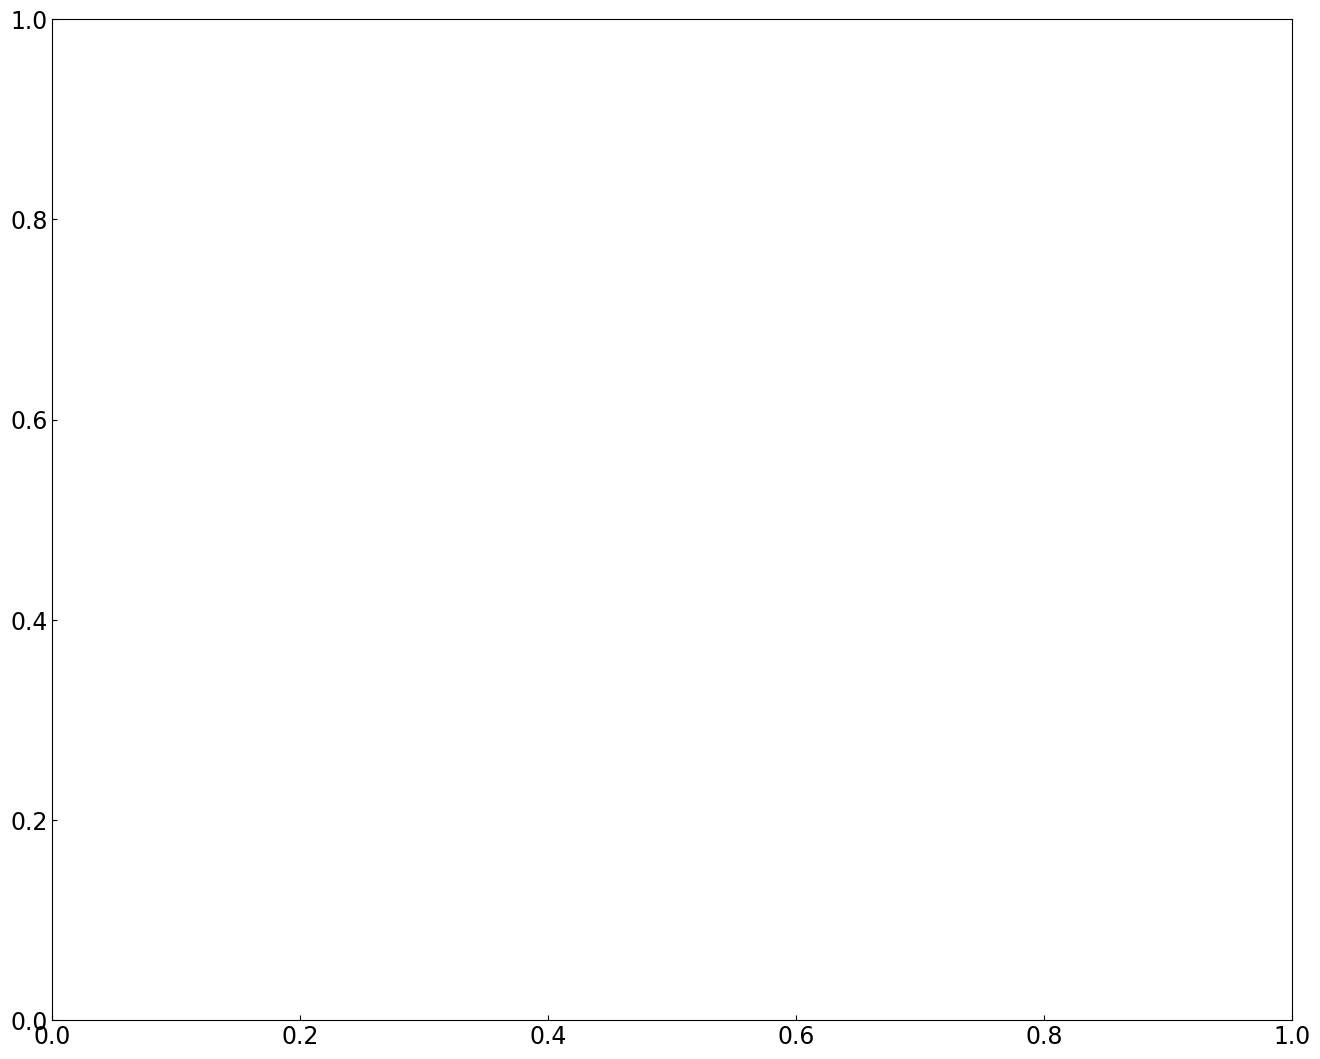

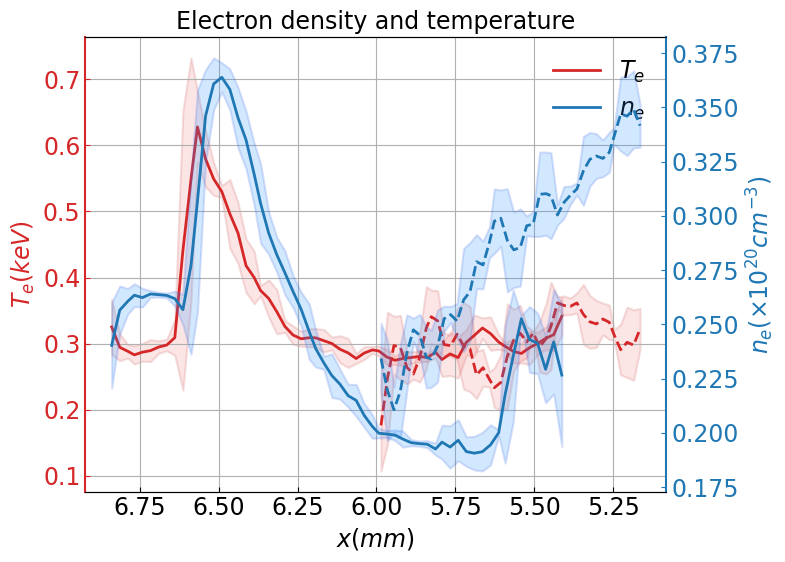

In [7]:
### PLOT STITCHED 92527-92530 EPW ###
%load_ext autoreload
%autoreload 2
from plot_stitch_92527_92530_EPW import plot_stitch_92527_92530_EPW
plot_stitch_92527_92530_EPW(data)

In [ ]:
### PLOT STITCHED SHOCKS ###
im1 = data['92535']['92535_30_nersc.csv']
im2 = data['92536']['92536_19_nersc.csv']
im3 = data['92537']['92537_5_nersc.csv']
r1 = shot_data.loc[92535,"pointing"] - im1["Radius (\\mum)"]/10**3  # convert to mm and shift 
r2 = shot_data.loc[92536,"pointing"] - im2["Radius (\\mum)"]/10**3
r3 = shot_data.loc[92537,"pointing"] - im3["Radius (\\mum)"]/10**3
## Ti, Va, fract plot for all 3 species 
plt.rcParams.update({
#    "font.family": "serif",             # pick font family
#    "font.serif": ["Arial"],  # pick specific font
    "font.size": 17,                     # set size
    "axes.labelsize": 17,    # font size for axis labels
    "axes.titlesize": 17     # font size for titles
})

fig1, ax1  = plt.subplots(3,1,figsize=(10,20))

ax1[0].plot(r1, im1["fract_ion-1"],color='orangered',linewidth=2, linestyle='-', label='hot H')
ax1[0].plot(r1, im1["fract_ion-2"],color='mediumblue',linewidth=2, linestyle='-', label='cold H')
ax1[0].plot(r1, im1["fract_ion-3"],color='MediumSeaGreen',linewidth=2, linestyle='-', label='He')

ax1[0].plot(r2, im2["fract_ion-1"],color='orangered',linewidth=2, linestyle='--')
ax1[0].plot(r2, im2["fract_ion-2"],color='mediumblue',linewidth=2, linestyle='--')
ax1[0].plot(r2, im2["fract_ion-3"],color='MediumSeaGreen',linewidth=2, linestyle='--')

ax1[0].plot(r3, im3["fract_ion-1"],color='orangered',linewidth=2, linestyle=':')
#ax1[0].plot(r3, im3["fract_ion-2"],color='mediumblue',linewidth=2, linestyle=':')
ax1[0].plot(r3, im3['fract_ion-2'],color='MediumSeaGreen',linewidth=2, linestyle=':')

ax1[0].set_title('Fractions')
ax1[0].set_xlabel(r"$x (\mu m)$")
ax1[0].set_ylabel(r"$Fraction$")
ax1[0].legend()


ax1[1].plot(r1, im1["Ti_ion-1"],color='orangered',linewidth=2, linestyle='-')
ax1[1].plot(r1, im1["Ti_ion-2"],color='mediumblue',linewidth=2, linestyle='-')
ax1[1].plot(r1, im1["Ti_ion-3"],color='mediumseagreen',linewidth=2, linestyle='-')

ax1[1].plot(r2, im2["Ti_ion-1"],color='orangered',linewidth=2, linestyle='--')
ax1[1].plot(r2, im2["Ti_ion-2"],color='mediumblue',linewidth=2, linestyle='--')
ax1[1].plot(r2, im2["Ti_ion-3"],color='MediumSeaGreen',linewidth=2, linestyle='--')

ax1[1].plot(r3, im3["Ti_ion-1"],color='orangered',linewidth=2, linestyle=':')
#ax1[1].plot(r3, im3["Ti_ion-2"],color='mediumblue',linewidth=2, linestyle=':')
ax1[1].plot(r3, im3["Ti_ion-2"],color='MediumSeaGreen',linewidth=2, linestyle=':')
ax1[1].legend()
ax1[1].set_title('Temperatures')
ax1[1].set_xlabel(r"$x (\mu m)$")
ax1[1].set_ylabel(r"$T_{i} (keV)$")


ax1[2].plot(r1, im1["Va_ion-1"],color='orangered',linewidth=2, linestyle='-')
ax1[2].plot(r1, im1["Va_ion-2"],color='mediumblue',linewidth=2, linestyle='-')
ax1[2].plot(r1, im1["Va_ion-3"],color='MediumSeaGreen',linewidth=2, linestyle='-')

ax1[2].plot(r2, im2["Va_ion-1"],color='orangered',linewidth=2, linestyle='--')
ax1[2].plot(r2, im2["Va_ion-2"],color='mediumblue',linewidth=2, linestyle='--')
ax1[2].plot(r2, im2["Va_ion-3"],color='MediumSeaGreen',linewidth=2, linestyle='--')

ax1[2].plot(r3, im3["Va_ion-1"],color='orangered',linewidth=2, linestyle=':')
#ax1[2].plot(r3, im3["Va_ion-2"],color='mediumblue',linewidth=2, linestyle=':')
ax1[2].plot(r3, im3["Va_ion-2"],color='MediumSeaGreen',linewidth=2, linestyle=':')
ax1[2].set_title('Velocities')
ax1[2].set_xlabel(r"$x (\mu m)$")
ax1[2].set_ylabel(r"$Va_{i} (\mu m/ns)$")


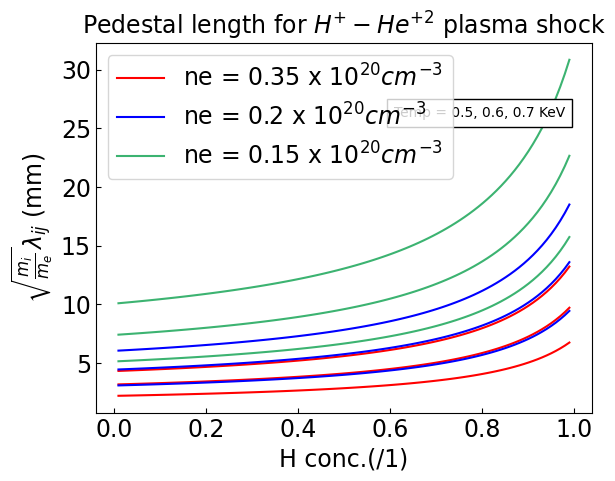

/var/folders/y2/009_g4fj45q544nd56pkrgpw0000gn/T/ipykernel_40578/2659828929.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1[1].legend()


Text(0, 0.5, '$T_{e} (keV)$')

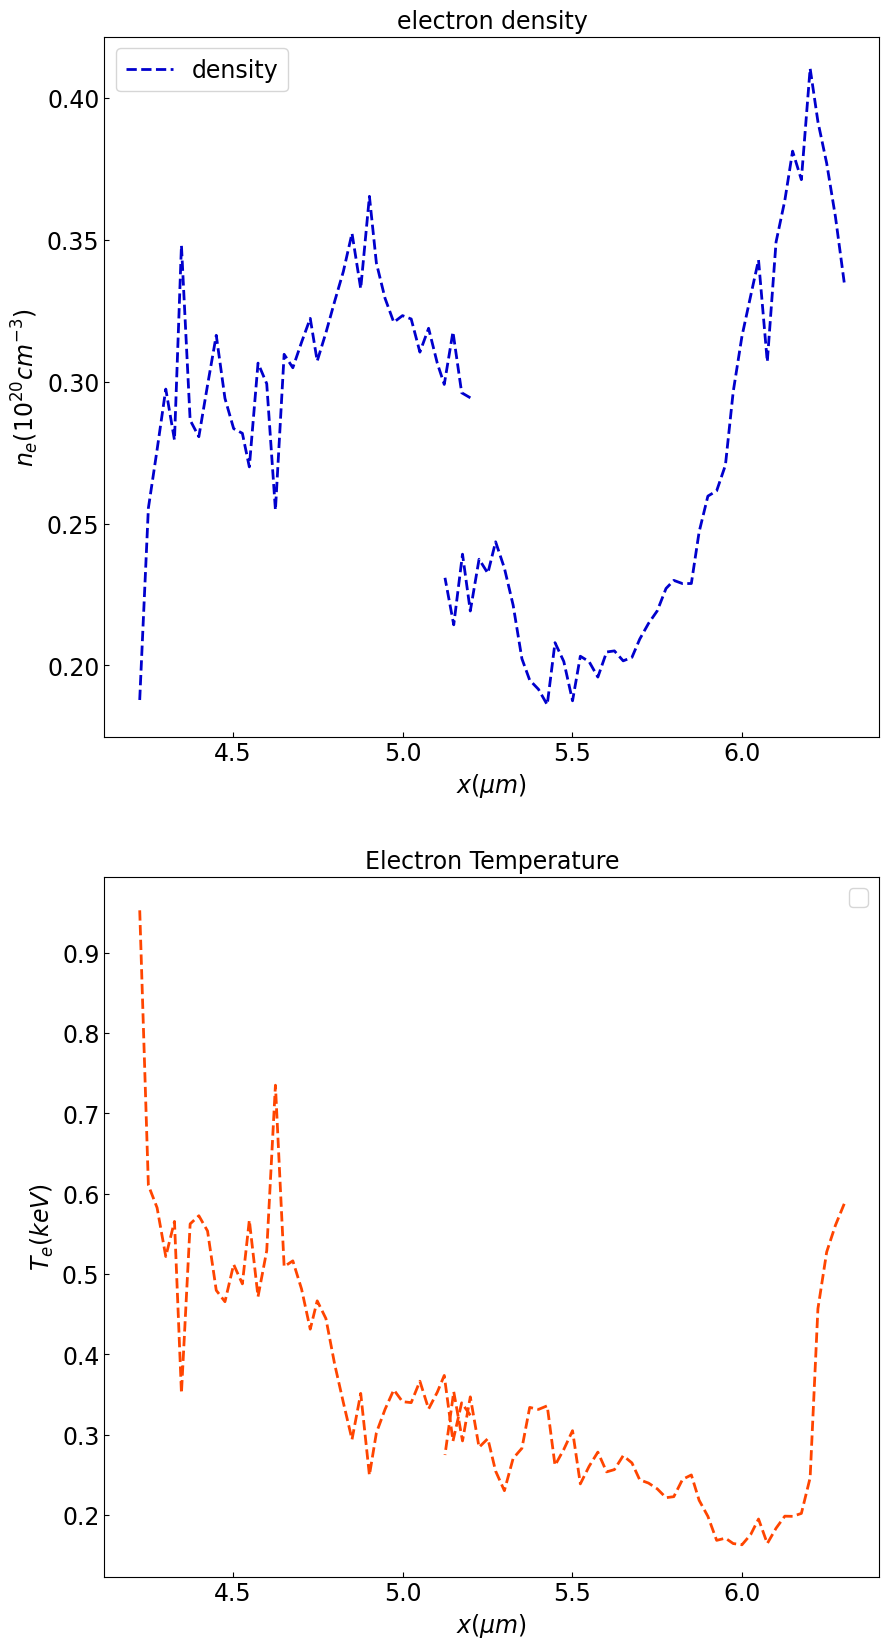

In [20]:
### PLOT STITCHED EPW SHOCKS ###
# im1 = data['92536']['92536_9_nersc.csv']
# im2 = data['92537']['92537_8_nersc.csv']
im1 = data['92527']['92527_19_nersc.csv']
im2 = data['92530']['92530_5_nersc.csv']
#im3 = data['92537']['92537_3_nersc.csv']
r1 = shot_data.loc[92527,"pointing"] - im1["Radius (\\mum)"]/10**3  # convert to mm and shift 
r2 = shot_data.loc[92530,"pointing"] - im2["Radius (\\mum)"]/10**3
#r3 = shot_data.loc[92537,"pointing"] - im3["Radius (\\mum)"]/10**3
## Ti, Va, fract plot for all 3 species 
plt.rcParams.update({
#    "font.family": "serif",             # pick font family
#    "font.serif": ["Arial"],  # pick specific font
    "font.size": 17,                     # set size
    "axes.labelsize": 17,    # font size for axis labels
    "axes.titlesize": 17     # font size for titles
})

fig1, ax1  = plt.subplots(2,1,figsize=(10,20))

ax1[0].plot(r1, im1["ne_electron"],color='mediumblue',linewidth=2, linestyle='--', label='density')
ax1[0].plot(r2, im2["ne_electron"],color='mediumblue',linewidth=2, linestyle='--')
ax1[0].set_title('electron density')
ax1[0].set_xlabel(r"$x (\mu m)$")
ax1[0].set_ylabel(r"$n_e (10^{20} cm^{-3})$")
ax1[0].legend()


ax1[1].plot(r1, im1["Te_electron"],color='orangered',linewidth=2, linestyle='--')
ax1[1].plot(r2, im2["Te_electron"],color='orangered',linewidth=2, linestyle='--')
ax1[1].legend()
ax1[1].set_title('Electron Temperature')
ax1[1].set_xlabel(r"$x (\mu m)$")
ax1[1].set_ylabel(r"$T_{e} (keV)$")